In [1]:
from datetime import datetime
import random
import routingpy as rp
from shapely.geometry import box, Point, Polygon
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as cx

In [2]:
V = rp.Valhalla("http://valhalla_hist_traffic-valhalla-1:8002")
START_TIME = 1646625600
END_TIME = START_TIME + 24 * 60 * 60
BASEMAP_SOURCE = cx.providers.OpenStreetMap.Mapnik
LOCATIONS = [
    q
]

In [3]:
def strf_epoch(e: int) -> str:
    return datetime.utcfromtimestamp(e).isoformat()[:-3]

In [4]:
def time_range(start_epoch: int, end_epoch: int, step: int = 300):
    for time_ in range(start_epoch, end_epoch, step):
        yield {"type": 1, "value": strf_epoch(time_)}


In [5]:
def random_coordinates(n, min_dist, max_dist):
    bbox = [13.280066,52.459562,13.507532,52.576611]  # bbox Berlin
    minx, miny, maxx, maxy = bbox
    poly_berlin = box(*bbox)
    assert min_dist < max_dist # make sure parameters are valid
    
    coordinates = False
    last_coord = None
    for _ in range(n):
        counter = 0
        in_poly = False
        while not in_poly:
            counter += 1
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            p = Point(x, y)
            if poly_berlin.contains(p):
                # Make sure all route segments are within limits
                if coordinates:
                    if not min_dist < p.distance(Point(last_coord)) < max_dist:
                        continue
                # coordinates.append([x, y])
                in_poly = True
                last_coord = [x, y]
                yield [x, y]
            if counter > 1000:
                raise ValueError("Distance settings are too restrictive. Try a wider range and remember it's in degrees.")

In [25]:
isochrones = []
for location in random_coordinates(10, 0.1, 2):
    for date_time in time_range(START_TIME, END_TIME, 1200):
        isochrone = V.isochrones(locations=location, profile="auto", intervals=[500], date_time=date_time)
        iso_geom = Polygon(isochrone[0].geometry)
        isochrones.append({"data": {"time": date_time["value"], "center": Point(*location)}, "geometry": iso_geom})

In [26]:
iso_df = gpd.GeoDataFrame(data=[i["data"] for i in isochrones] ,geometry=[i["geometry"] for i in isochrones], crs="EPSG:4326")

In [27]:
iso_df_polys = iso_df.drop(columns=["center"])


In [28]:
with open("./isochrones.geojson", "w") as fh:
    fh.write(iso_df_polys.to_json())

In [29]:
with open("./points.geojson", "w") as fh:
    fh.write(gpd.GeoDataFrame(iso_df["center"].drop_duplicates()).rename(columns={"center": "geometry"}).to_json())

<AxesSubplot:>

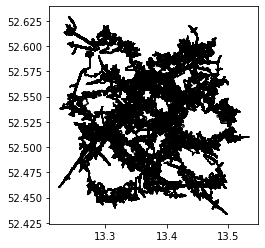

In [30]:
iso_df.plot(color='none', edgecolor='black')

In [44]:
import requests

In [24]:
V.isochrones(locations=location, profile="auto", intervals=[500], date_time={
      "type": 1,
      "value": "2022-03-08T03:40"
    }, dry_run=False)

Isochrones([Isochrone([[13.466988, 52.549654], [13.466747, 52.546851], [13.466166, 52.54661], [13.467524, 52.546146], [13.467252, 52.54461], [13.468524, 52.54361], [13.468579, 52.54161], [13.469438, 52.54061], [13.469073, 52.53961], [13.470274, 52.538896], [13.471499, 52.537121], [13.472243, 52.536865], [13.471988, 52.536033], [13.471225, 52.53661], [13.471439, 52.537061], [13.469886, 52.536712], [13.468988, 52.535834], [13.467988, 52.536236], [13.467439, 52.534159], [13.464911, 52.533687], [13.464835, 52.532763], [13.462096, 52.53261], [13.461355, 52.531243], [13.459988, 52.530277], [13.457918, 52.53054], [13.457988, 52.53198], [13.455811, 52.532433], [13.454322, 52.533945], [13.452701, 52.53461], [13.45274, 52.533362], [13.454101, 52.531724], [13.454111, 52.53061], [13.455567, 52.530189], [13.455833, 52.52961], [13.454988, 52.528874], [13.45375, 52.528848], [13.452988, 52.52799], [13.450822, 52.528444], [13.450291, 52.52961], [13.447988, 52.530523], [13.446988, 52.530396], [13.444988

8.333333333333334